In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model

In [2]:
gdata=pd.read_csv('Downloads/BankChurners.csv')

In [56]:
gdata

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status
0,768805383,1,45,1,3,3,Married,2,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,1,49,0,5,2,Single,4,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
3,769911858,1,40,0,4,3,Unknown,4,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3
5,713061558,1,44,1,2,2,Married,1,0,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1
6,810347208,1,51,1,4,6,Married,0,1,46,...,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,1,54,1,1,3,Single,2,0,34,...,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,2
10121,713899383,1,56,0,1,2,Single,4,0,50,...,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,2
10122,772366833,1,50,1,2,2,Single,1,0,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,2
10123,710638233,0,41,1,2,6,Divorced,1,0,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0


In [4]:
gdata.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
gdata.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
del gdata['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

In [8]:
del gdata['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [9]:
gdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
gdata.dropna(axis=0,inplace=True)

In [12]:
Label_encoder=preprocessing.LabelEncoder()
gdata['Attrition_Flag']=Label_encoder.fit_transform(gdata['Attrition_Flag'])
gdata['Gender']=Label_encoder.fit_transform(gdata['Gender'])
gdata['Education_Level']=Label_encoder.fit_transform(gdata['Education_Level'])
gdata['Marital_Status ']=Label_encoder.fit_transform(gdata['Marital_Status'])
gdata['Income_Category']=Label_encoder.fit_transform(gdata['Income_Category'])
gdata['Card_Category']=Label_encoder.fit_transform(gdata['Card_Category'])

In [13]:
gdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status
0,768805383,1,45,1,3,3,Married,2,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,1,49,0,5,2,Single,4,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,713982108,1,51,1,3,2,Married,3,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,1,40,0,4,3,Unknown,4,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3
4,709106358,1,40,1,3,5,Married,2,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [14]:
gdata.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Marital_Status              0
dtype: int64

#### cleaning the data 

In [15]:
import seaborn as sns

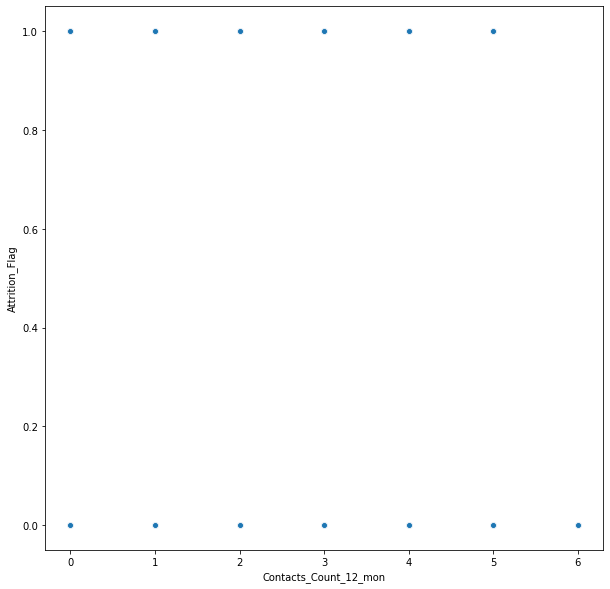

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Contacts_Count_12_mon'],y=gdata['Attrition_Flag'])

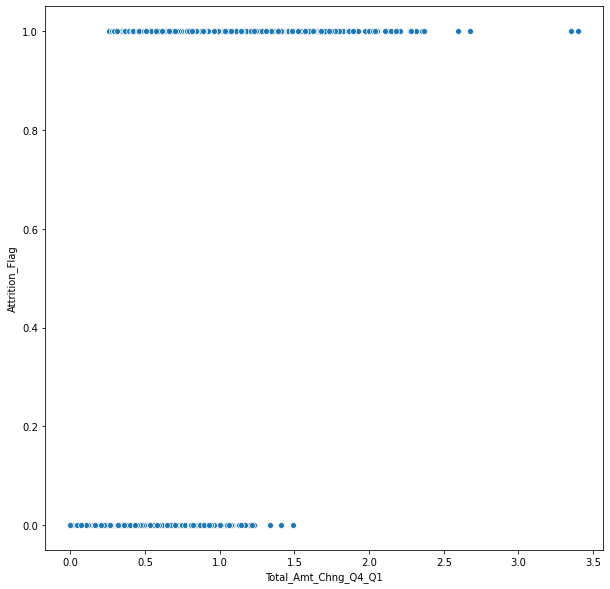

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Total_Amt_Chng_Q4_Q1'],y=gdata['Attrition_Flag'])

In [19]:
a=gdata.loc[gdata['Total_Amt_Chng_Q4_Q1'] > 3.0].index
print(a)
gdata.drop(a , inplace=True)

Int64Index([], dtype='int64')


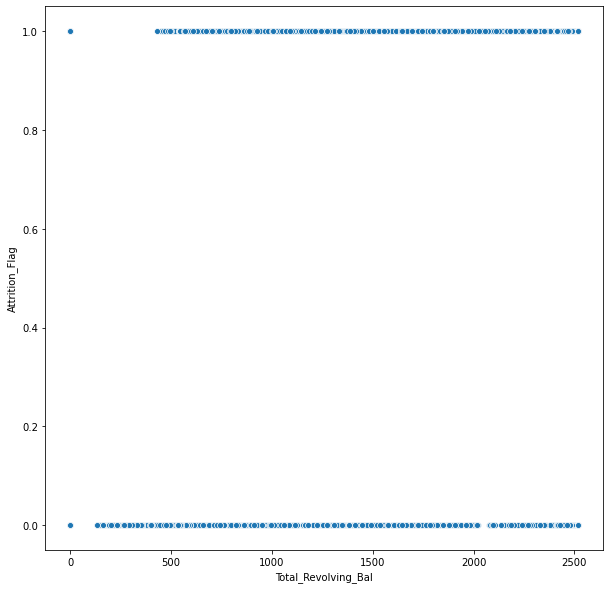

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Total_Revolving_Bal'],y=gdata['Attrition_Flag'])

In [21]:
a=gdata.loc[gdata['Total_Revolving_Bal'] < 50].index
print(a)
gdata.drop(a , inplace=True)

Int64Index([    2,     4,    21,    24,    28,    37,    43,    45,    54,
               61,
            ...
            10093, 10094, 10098, 10100, 10103, 10109, 10112, 10114, 10124,
            10125],
           dtype='int64', length=2469)


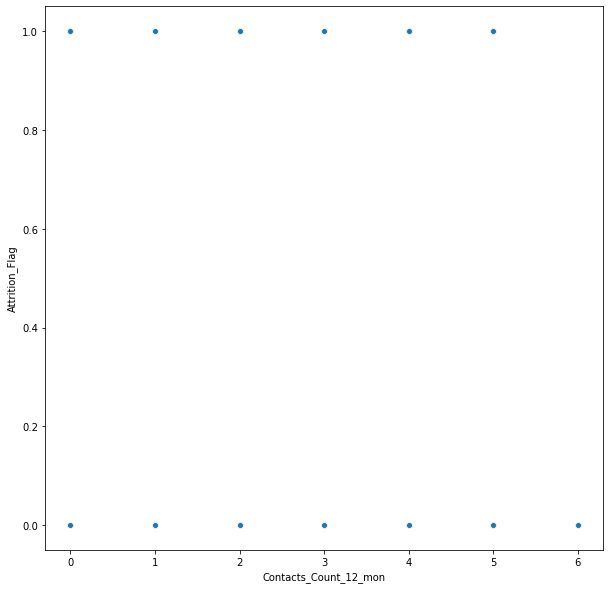

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Contacts_Count_12_mon'],y=gdata['Attrition_Flag'])

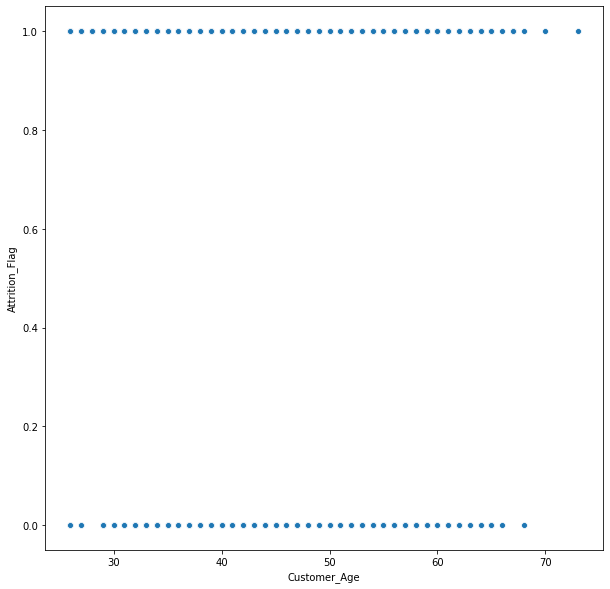

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Customer_Age'],y=gdata['Attrition_Flag'])

In [24]:
a=gdata.loc[gdata['Customer_Age'] >70].index
print(a)
gdata.drop(a , inplace=True)

Int64Index([251], dtype='int64')


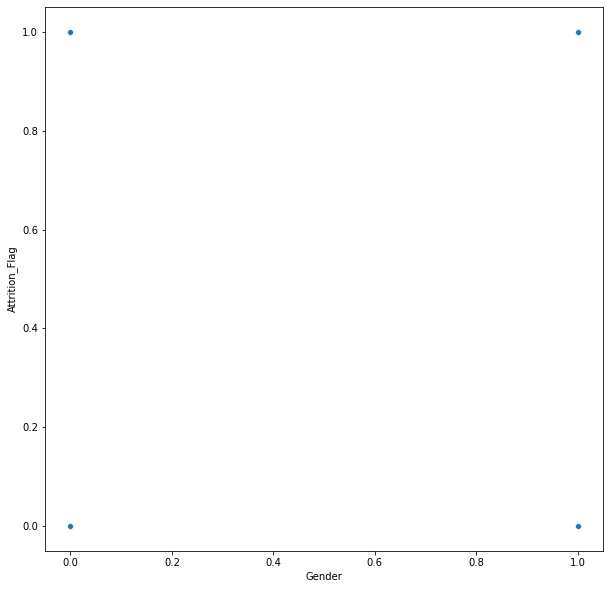

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Gender'],y=gdata['Attrition_Flag'])

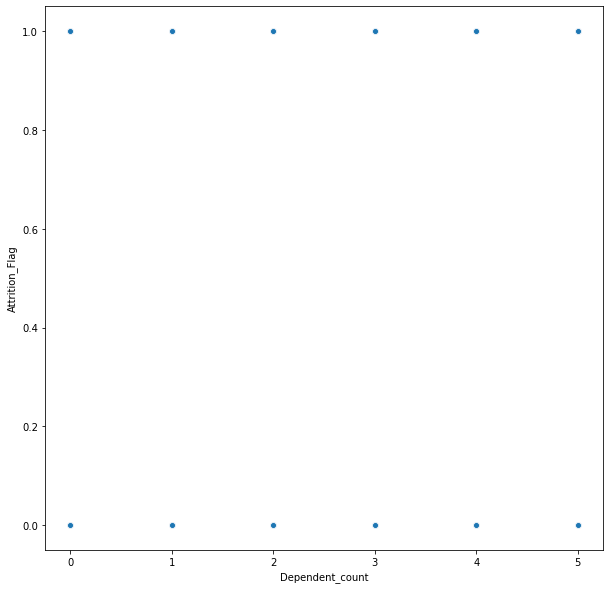

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Dependent_count'],y=gdata['Attrition_Flag'])

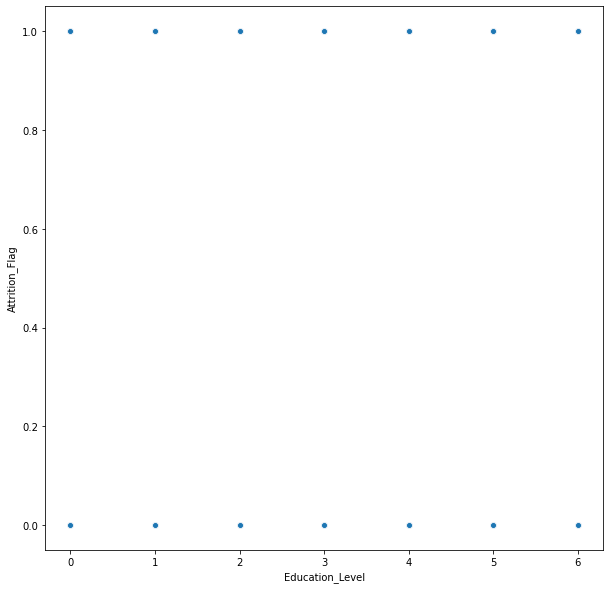

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Education_Level'],y=gdata['Attrition_Flag'])

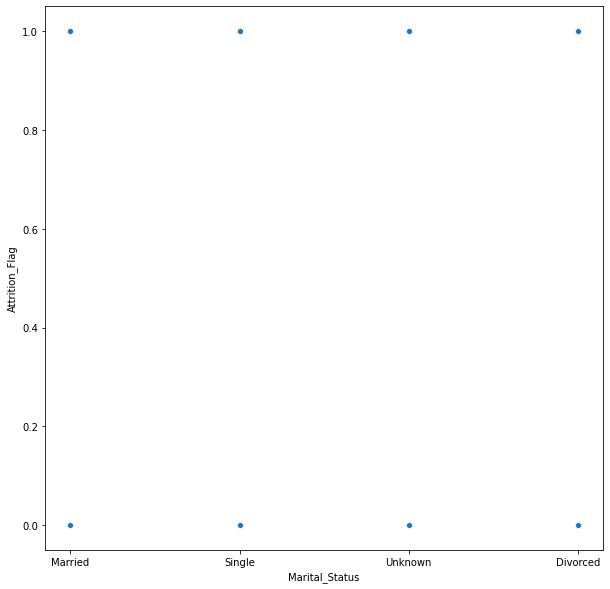

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Marital_Status'],y=gdata['Attrition_Flag'])

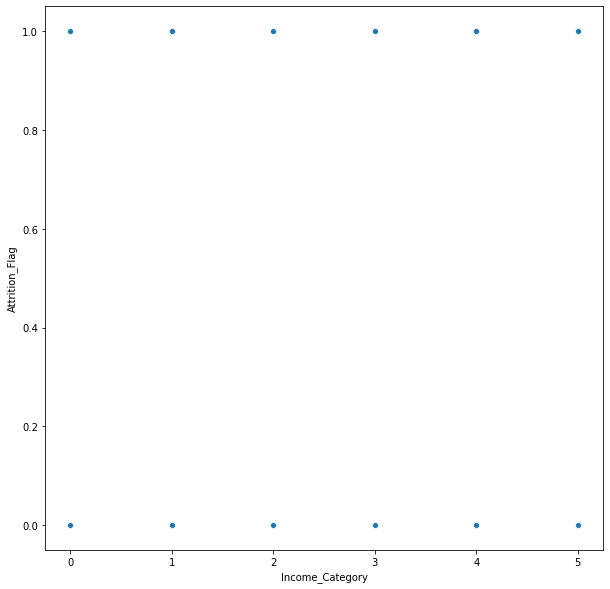

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=gdata['Income_Category'],y=gdata['Attrition_Flag'])

In [32]:
import statsmodels.api as sn

In [33]:
gdata.corr()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status
CLIENTNUM,1.000000,0.031968,-0.005667,0.020935,0.015031,-0.000702,-0.015199,0.008617,0.123872,0.005981,...,0.013796,0.003072,-0.022613,0.004427,0.008928,-0.020032,-0.012346,0.002127,-0.011853,-0.005645
Attrition_Flag,0.031968,1.000000,-0.017651,0.025031,-0.012143,-0.007295,-0.021782,-0.005529,-0.017914,0.116399,...,-0.149705,0.004091,0.027551,0.002438,0.102676,0.127533,0.286999,0.236952,0.004325,-0.011401
Customer_Age,-0.005667,-0.017651,1.000000,-0.018420,-0.126158,0.004643,-0.010283,-0.029790,0.789638,-0.006933,...,-0.015689,-0.001426,0.009779,-0.002012,-0.071086,-0.045576,-0.068247,-0.013527,0.000125,-0.019880
Gender,0.020935,0.025031,-0.018420,1.000000,-0.000578,0.014435,-0.534047,0.076437,-0.001355,0.000566,...,0.039458,0.416278,0.007384,0.415684,0.020299,0.016595,-0.084185,-0.026613,-0.384536,-0.004226
Dependent_count,0.015031,-0.012143,-0.126158,-0.000578,1.000000,0.003525,-0.032271,0.022218,-0.105379,-0.042901,...,-0.046830,0.072894,0.000027,0.072866,-0.032577,0.024769,0.058194,0.021767,-0.048969,0.004031
Education_Level,-0.000702,-0.007295,0.004643,0.014435,0.003525,1.000000,-0.019823,-0.006032,-0.004829,0.019029,...,0.005619,0.005865,0.006670,0.005463,0.005175,0.010591,0.001870,-0.000112,0.004777,0.022295
Income_Category,-0.015199,-0.021782,-0.010283,-0.534047,-0.032271,-0.019823,1.000000,-0.051332,-0.017628,0.000922,...,-0.020094,-0.222057,-0.009562,-0.221403,-0.005327,-0.013303,0.036138,0.026802,0.192461,0.009122
Card_Category,0.008617,-0.005529,-0.029790,0.076437,0.022218,-0.006032,-0.051332,1.000000,-0.024932,-0.080168,...,0.000284,0.494985,0.010032,0.494203,0.002828,0.181370,0.121077,-0.013008,-0.294094,0.024075
Months_on_book,0.123872,-0.017914,0.789638,-0.001355,-0.105379,-0.004829,-0.017628,-0.024932,1.000000,-0.010375,...,-0.005968,0.005552,0.006296,0.005172,-0.053361,-0.034096,-0.050835,-0.013425,-0.015815,-0.022846
Total_Relationship_Count,0.005981,0.116399,-0.006933,0.000566,-0.042901,0.019029,0.000922,-0.080168,-0.010375,1.000000,...,0.071904,-0.085685,-0.018328,-0.084556,0.042149,-0.391282,-0.304642,0.028175,0.071962,-0.021328


In [37]:
from sklearn.linear_model import LogisticRegression

In [63]:
maxmin = MinMaxScaler()
dummies = pd.get_dummies(gdata[gdata.columns.difference(["Attrition_Flag"])])
x = maxmin.fit_transform(dummies)
y = gdata["Attrition_Flag"]

print(x.shape)
print(y.shape)

(7655, 24)
(7655,)


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5741, 24) (1914, 24) (5741,) (1914,)


In [65]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [66]:
y_pred = log_reg_model.predict(x_test)
df_predict = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df_predict

,Actual,Predicted
5515,1,1
8572,1,1
8081,1,1
5448,1,1
8895,1,1
...,...,...
4759,1,1
9890,1,1
1132,1,1
4576,1,1


In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
accuracy_score(y_test,y_pred)

0.9205851619644723

In [69]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.70      0.25      0.37       178
           1       0.93      0.99      0.96      1736

    accuracy                           0.92      1914
   macro avg       0.82      0.62      0.66      1914
weighted avg       0.91      0.92      0.90      1914



In [70]:
print((confusion_matrix(y_test,y_pred)))

[[  45  133]
 [  19 1717]]
